In [1]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np


In [45]:
classes = pd.read_csv("open_images/class-descriptions-boxable.csv", names=["id","label"])
classes.head(5)

,id,label
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


In [46]:
s0 = pd.Series(classes["id"])
s1 = pd.Series(classes["label"])

In [47]:
class_dict = {s0[i]: s1[i] for i in range(len(s0))} 
class_dict

{'/m/011k07': 'Tortoise',
 '/m/011q46kg': 'Container',
 '/m/012074': 'Magpie',
 '/m/0120dh': 'Sea turtle',
 '/m/01226z': 'Football',
 '/m/012n7d': 'Ambulance',
 '/m/012w5l': 'Ladder',
 '/m/012xff': 'Toothbrush',
 '/m/012ysf': 'Syringe',
 '/m/0130jx': 'Sink',
 '/m/0138tl': 'Toy',
 '/m/013y1f': 'Organ',
 '/m/01432t': 'Cassette deck',
 '/m/014j1m': 'Apple',
 '/m/014sv8': 'Human eye',
 '/m/014trl': 'Cosmetics',
 '/m/014y4n': 'Paddle',
 '/m/0152hh': 'Snowman',
 '/m/01599': 'Beer',
 '/m/01_5g': 'Chopsticks',
 '/m/015h_t': 'Human beard',
 '/m/015p6': 'Bird',
 '/m/015qbp': 'Parking meter',
 '/m/015qff': 'Traffic light',
 '/m/015wgc': 'Croissant',
 '/m/015x4r': 'Cucumber',
 '/m/015x5n': 'Radish',
 '/m/0162_1': 'Towel',
 '/m/0167gd': 'Doll',
 '/m/016m2d': 'Skull',
 '/m/0174k2': 'Washing machine',
 '/m/0174n1': 'Glove',
 '/m/0175cv': 'Tick',
 '/m/0176mf': 'Belt',
 '/m/017ftj': 'Sunglasses',
 '/m/018j2': 'Banjo',
 '/m/018p4k': 'Cart',
 '/m/018xm': 'Ball',
 '/m/01940j': 'Backpack',
 '/m/0199g': 'Bi

In [44]:
df = pd.read_csv("open_images/sub-test-annotations-bbox.csv")
df.head(5)

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,id,ClassName
0,97fa273c94d456a5,freeform,/m/0ch_cf,1,0.368117,0.695191,0.089903,0.665121,0,0,0,0,0,/m/0ch_cf,Fish
1,e8fce572baba1833,freeform,/m/0ch_cf,1,0.000000,0.952560,0.071497,1.000000,0,1,0,0,0,/m/0ch_cf,Fish
2,64a4c54e1a130479,freeform,/m/03fj2,1,0.904447,0.995674,0.387927,0.467825,0,0,0,0,0,/m/03fj2,Goldfish
3,1fe26e2a7eca0583,freeform,/m/0ch_cf,1,0.513197,0.635599,0.174802,0.241815,0,0,0,0,0,/m/0ch_cf,Fish
4,d4ac483e6cf941ae,freeform,/m/0ch_cf,1,0.139483,0.977034,0.211361,0.852199,0,0,0,0,0,/m/0ch_cf,Fish


In [50]:
img_id_picked = df[df['ImageID']=="8965f3d704cd8834"].index.values
img_id_picked

array([589])

In [55]:
df.iloc[589]

ImageID        8965f3d704cd8834
Source                 freeform
LabelName             /m/0ch_cf
Confidence                    1
XMin                          0
XMax                          1
YMin                          0
YMax                          1
IsOccluded                    1
IsTruncated                   0
IsGroupOf                     1
IsDepiction                   0
IsInside                      0
id                    /m/0ch_cf
ClassName                  Fish
Name: 589, dtype: object

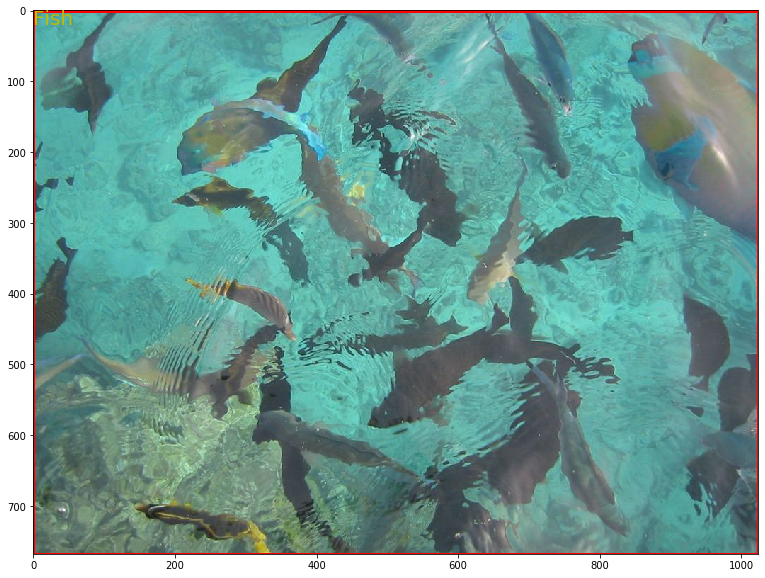

In [51]:


img_id = df['ImageID'][589]
img = mpimg.imread("open_images/test/"+"8965f3d704cd8834"+".jpg")
img_h, img_w, _ = img.shape
fig, ax = plt.subplots(figsize=(20, 10))

objs = np.array(df[df['ImageID']==img_id][['LabelName', 'XMin', 'XMax', 'YMin', 'YMax']])
for obj in objs:
    ax.text(obj[1]*img_w, obj[3]*img_h+20, class_dict[obj[0]], size=20, color='y')
    rect = patches.Rectangle((obj[1]*img_w,obj[3]*img_h),(obj[2]-obj[1])*img_w,(obj[4]-obj[3])*img_h,
                             linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
ax.imshow(img)



In [56]:
df = pd.read_csv("open_images/sub-train-annotations-bbox.csv")
df.head(5)

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,id,ClassName
0,0566cb7b75f522f2,xclick,/m/0ch_cf,1,0.875625,0.999375,0.113333,0.587500,0,1,0,0,0,/m/0ch_cf,Fish
1,7e434e1857d32824,xclick,/m/0ch_cf,1,0.275285,0.470194,0.375000,0.494186,0,0,0,0,0,/m/0ch_cf,Fish
2,00c4b878d279f6c3,xclick,/m/0ch_cf,1,0.134375,0.790625,0.554167,0.880000,0,0,0,0,0,/m/0ch_cf,Fish
3,cc29d2d67a07794e,xclick,/m/0ch_cf,1,0.426875,0.616250,0.447699,0.564854,1,0,0,0,0,/m/0ch_cf,Fish
4,1cccf036cfb3cf6f,activemil,/m/0ch_cf,1,0.117188,0.614258,0.424638,0.762319,1,0,0,0,0,/m/0ch_cf,Fish


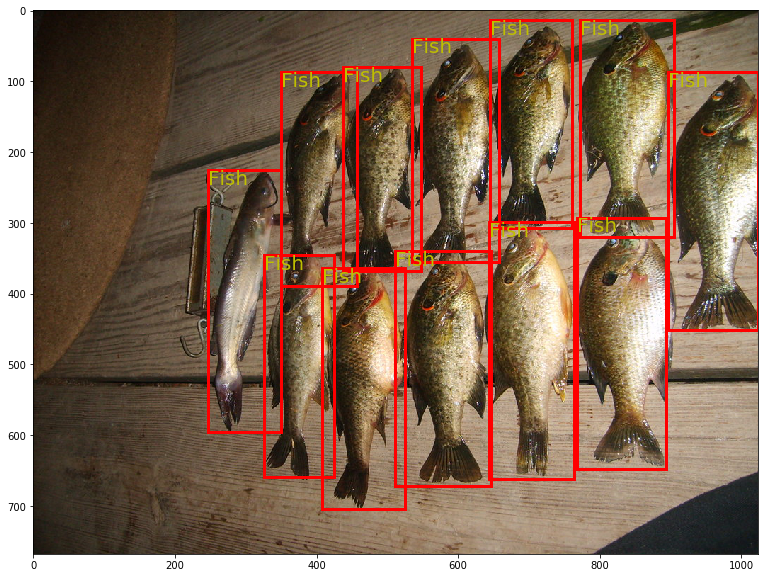

In [57]:


img_id = df['ImageID'][0]
img = mpimg.imread("open_images/train/"+img_id+".jpg")
img_h, img_w, _ = img.shape
fig, ax = plt.subplots(figsize=(20, 10))

objs = np.array(df[df['ImageID']==img_id][['LabelName', 'XMin', 'XMax', 'YMin', 'YMax']])
for obj in objs:
    ax.text(obj[1]*img_w, obj[3]*img_h+20, class_dict[obj[0]], size=20, color='y')
    rect = patches.Rectangle((obj[1]*img_w,obj[3]*img_h),(obj[2]-obj[1])*img_w,(obj[4]-obj[3])*img_h,
                             linewidth=3,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
ax.imshow(img)



In [60]:
label_id = pd.Series(df['LabelName'])
label_id

0        /m/0ch_cf
1        /m/0ch_cf
2        /m/0ch_cf
3        /m/0ch_cf
4        /m/0ch_cf
5         /m/03fj2
6        /m/0ch_cf
7        /m/0ch_cf
8         /m/03fj2
9        /m/0ch_cf
10       /m/0ch_cf
11       /m/0ch_cf
12       /m/0ch_cf
13       /m/0ch_cf
14       /m/0ch_cf
15       /m/0ch_cf
16       /m/0ch_cf
17       /m/0ch_cf
18       /m/0ch_cf
19       /m/0ch_cf
20       /m/0ch_cf
21       /m/0ch_cf
22        /m/03fj2
23       /m/0ch_cf
24       /m/0ch_cf
25       /m/0ch_cf
26       /m/0ch_cf
27       /m/0ch_cf
28       /m/0ch_cf
29       /m/0ch_cf
           ...    
25994    /m/0ch_cf
25995    /m/0ch_cf
25996    /m/0ch_cf
25997    /m/0ch_cf
25998    /m/0ch_cf
25999    /m/0ch_cf
26000    /m/0ch_cf
26001    /m/0ch_cf
26002    /m/0ch_cf
26003    /m/0ch_cf
26004    /m/0ch_cf
26005    /m/0ch_cf
26006    /m/0ch_cf
26007    /m/0ch_cf
26008    /m/0ch_cf
26009    /m/0ch_cf
26010    /m/0ch_cf
26011     /m/03fj2
26012     /m/03fj2
26013    /m/0ch_cf
26014    /m/0ch_cf
26015    /m/

In [62]:
labels = []
for x in label_id:
    value = class_dict[x]
    labels.append(value)
labels

['Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Goldfish',
 'Fish',
 'Fish',
 'Goldfish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Goldfish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Goldfish',
 'Goldfish',
 'Fish',
 'Goldfish',
 'Goldfish',
 'Shark',
 'Fish',
 'Goldfish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Shark',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Goldfish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Goldfish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Goldfish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Goldfish',
 'Fish',
 'Fish',
 'Fish',
 'Fish',
 'Fis

In [63]:
df = df[['ImageID', 'LabelName', 'XMin', 'XMax', 'YMin', 'YMax']]
df["class"] = labels
df.head(5)

,ImageID,LabelName,XMin,XMax,YMin,YMax,class
0,0566cb7b75f522f2,/m/0ch_cf,0.875625,0.999375,0.113333,0.587500,Fish
1,7e434e1857d32824,/m/0ch_cf,0.275285,0.470194,0.375000,0.494186,Fish
2,00c4b878d279f6c3,/m/0ch_cf,0.134375,0.790625,0.554167,0.880000,Fish
3,cc29d2d67a07794e,/m/0ch_cf,0.426875,0.616250,0.447699,0.564854,Fish
4,1cccf036cfb3cf6f,/m/0ch_cf,0.117188,0.614258,0.424638,0.762319,Fish


In [65]:
df.to_csv('data/fish_train.csv', index=False)

In [2]:
df = pd.read_csv("data/fish_train.csv")
df.head(5)

,ImageID,LabelName,XMin,XMax,YMin,YMax,class
0,0566cb7b75f522f2,/m/0ch_cf,0.875625,0.999375,0.113333,0.587500,Fish
1,7e434e1857d32824,/m/0ch_cf,0.275285,0.470194,0.375000,0.494186,Fish
2,00c4b878d279f6c3,/m/0ch_cf,0.134375,0.790625,0.554167,0.880000,Fish
3,cc29d2d67a07794e,/m/0ch_cf,0.426875,0.616250,0.447699,0.564854,Fish
4,1cccf036cfb3cf6f,/m/0ch_cf,0.117188,0.614258,0.424638,0.762319,Fish


In [19]:
import os
for filename in os.listdir("a"): 
    #print(filename)
    x = filename[:-4]
    dst = x + ".jpg"
    #print(dst)
    src ="a/"+ filename 
    dst ="a/"+ dst 

    os.rename(src, dst) 

DSCN4232_1.jpg
DSCN4232_1.jpg
Set2_DSCN1980.JPG_0.jpg
Set2_DSCN1980.JPG_0.jpg
DSCN4206_1.jpg
DSCN4206_1.jpg
Set2_DSCN1466.JPG_0.jpg
Set2_DSCN1466.JPG_0.jpg
Set2_DSCN1486.JPG_0.jpg
Set2_DSCN1486.JPG_0.jpg
Set2_DSCN3606.JPG_0.jpg
Set2_DSCN3606.JPG_0.jpg
Set2_DSCN3153.JPG_0.jpg
Set2_DSCN3153.JPG_0.jpg
DSCN4062_1.jpg
DSCN4062_1.jpg
Set2_DSCN3766.JPG_0.jpg
Set2_DSCN3766.JPG_0.jpg
Set2_DSCN3752.JPG_0.jpg
Set2_DSCN3752.JPG_0.jpg
Set2_DSCN2647.JPG_0.jpg
Set2_DSCN2647.JPG_0.jpg
Set2_DSCN4010.JPG_0.jpg
Set2_DSCN4010.JPG_0.jpg
DSCN4198_1.jpg
DSCN4198_1.jpg
Set2_DSCN2878.JPG_0.jpg
Set2_DSCN2878.JPG_0.jpg
Set2_DSCN3883.JPG_0.jpg
Set2_DSCN3883.JPG_0.jpg
Set2_DSCN2662.JPG_0.jpg
Set2_DSCN2662.JPG_0.jpg
Set2_DSCN1215.JPG_0.jpg
Set2_DSCN1215.JPG_0.jpg
DSCN4275_1.jpg
DSCN4275_1.jpg
DSCN4716.jpg
DSCN4716.jpg
DSCN4679.jpg
DSCN4679.jpg
Set2_DSCN2747.JPG_0.jpg
Set2_DSCN2747.JPG_0.jpg
DSCN1968_C.jpg
DSCN1968_C.jpg
Set2_DSCN2041.JPG_0.jpg
Set2_DSCN2041.JPG_0.jpg
DSCN4090_1.jpg
DSCN4090_1.jpg
DSCN4706.jpg
DSCN4

In [26]:
import os
from PIL import Image
from PIL import ImageOps

for filename in os.listdir("a"): 
    #print(filename)
    x = filename[:-4]
    dst = x + "_HF" + ".jpg"
    #print(dst)
    src ="a/"+ filename 
    dst ="ah/"+ dst 
        
    im = Image.open(src)
    im = ImageOps.mirror(im)
    im.save(dst)

DSCN4232_1.jpg
DSCN4232_1_HF.jpg
Set2_DSCN1980.JPG_0.jpg
Set2_DSCN1980.JPG_0_HF.jpg
DSCN4206_1.jpg
DSCN4206_1_HF.jpg
Set2_DSCN1466.JPG_0.jpg
Set2_DSCN1466.JPG_0_HF.jpg
Set2_DSCN1486.JPG_0.jpg
Set2_DSCN1486.JPG_0_HF.jpg
Set2_DSCN3606.JPG_0.jpg
Set2_DSCN3606.JPG_0_HF.jpg
Set2_DSCN3153.JPG_0.jpg
Set2_DSCN3153.JPG_0_HF.jpg
DSCN4062_1.jpg
DSCN4062_1_HF.jpg
Set2_DSCN3766.JPG_0.jpg
Set2_DSCN3766.JPG_0_HF.jpg
Set2_DSCN3752.JPG_0.jpg
Set2_DSCN3752.JPG_0_HF.jpg
Set2_DSCN2647.JPG_0.jpg
Set2_DSCN2647.JPG_0_HF.jpg
Set2_DSCN4010.JPG_0.jpg
Set2_DSCN4010.JPG_0_HF.jpg
DSCN4198_1.jpg
DSCN4198_1_HF.jpg
Set2_DSCN2878.JPG_0.jpg
Set2_DSCN2878.JPG_0_HF.jpg
Set2_DSCN3883.JPG_0.jpg
Set2_DSCN3883.JPG_0_HF.jpg
Set2_DSCN2662.JPG_0.jpg
Set2_DSCN2662.JPG_0_HF.jpg
Set2_DSCN1215.JPG_0.jpg
Set2_DSCN1215.JPG_0_HF.jpg
DSCN4275_1.jpg
DSCN4275_1_HF.jpg
DSCN4716.jpg
DSCN4716_HF.jpg
DSCN4679.jpg
DSCN4679_HF.jpg
Set2_DSCN2747.JPG_0.jpg
Set2_DSCN2747.JPG_0_HF.jpg
DSCN1968_C.jpg
DSCN1968_C_HF.jpg
Set2_DSCN2041.JPG_0.jpg
Set2_D

DSCN4063_1.jpg
DSCN4063_1_HF.jpg
Set2_DSCN2098.JPG_0.jpg
Set2_DSCN2098.JPG_0_HF.jpg
Set2_DSCN2917.JPG_0.jpg
Set2_DSCN2917.JPG_0_HF.jpg
Set2_DSCN1203.JPG_0.jpg
Set2_DSCN1203.JPG_0_HF.jpg
DSCN4283_1.jpg
DSCN4283_1_HF.jpg
DSCN4121_1.jpg
DSCN4121_1_HF.jpg
Set2_DSCN3266.JPG_0.jpg
Set2_DSCN3266.JPG_0_HF.jpg
Set2_DSCN3951.JPG_0.jpg
Set2_DSCN3951.JPG_0_HF.jpg
DSCN4169_1.jpg
DSCN4169_1_HF.jpg
Set2_DSCN2759.JPG_0.jpg
Set2_DSCN2759.JPG_0_HF.jpg
QC_DSCN4234_1.JPG_0.jpg
QC_DSCN4234_1.JPG_0_HF.jpg
DSCN4126_1.jpg
DSCN4126_1_HF.jpg
DSCN4439_1.jpg
DSCN4439_1_HF.jpg
Set2_DSCN2082.JPG_0.jpg
Set2_DSCN2082.JPG_0_HF.jpg
Set2_DSCN3264.JPG_0.jpg
Set2_DSCN3264.JPG_0_HF.jpg
DSCN4108_1.jpg
DSCN4108_1_HF.jpg
DSCN4447_1.jpg
DSCN4447_1_HF.jpg
DSCN4662.jpg
DSCN4662_HF.jpg
Set2_DSCN4022.JPG_0.jpg
Set2_DSCN4022.JPG_0_HF.jpg
DSCN4097_1.jpg
DSCN4097_1_HF.jpg
DSCN4248_1.jpg
DSCN4248_1_HF.jpg
Set2_DSCN3215.JPG_0.jpg
Set2_DSCN3215.JPG_0_HF.jpg
Set2_DSCN3428.JPG_0.jpg
Set2_DSCN3428.JPG_0_HF.jpg
Set2_DSCN1639.JPG_0.jpg
Set2_

DSCN4096_1.jpg
DSCN4096_1_HF.jpg
Set2_DSCN3661.JPG_0.jpg
Set2_DSCN3661.JPG_0_HF.jpg
Set2_DSCN1509.JPG_0.jpg
Set2_DSCN1509.JPG_0_HF.jpg
Set2_DSCN3949.JPG_0.jpg
Set2_DSCN3949.JPG_0_HF.jpg
Set2_DSCN2558.JPG_0.jpg
Set2_DSCN2558.JPG_0_HF.jpg
Set2_DSCN1256.JPG_0.jpg
Set2_DSCN1256.JPG_0_HF.jpg
DSCN4212_1.jpg
DSCN4212_1_HF.jpg
DSCN4288_1.jpg
DSCN4288_1_HF.jpg
Set2_DSCN2988.JPG_0.jpg
Set2_DSCN2988.JPG_0_HF.jpg
DSCN4342_1.jpg
DSCN4342_1_HF.jpg
DSCN4122_1.jpg
DSCN4122_1_HF.jpg
DSCN4306_1.jpg
DSCN4306_1_HF.jpg
Set2_DSCN3251.JPG_0.jpg
Set2_DSCN3251.JPG_0_HF.jpg
Set2_DSCN2035.JPG_0.jpg
Set2_DSCN2035.JPG_0_HF.jpg
DSCN4058.jpg
DSCN4058_HF.jpg
Set2_DSCN3799.JPG_0.jpg
Set2_DSCN3799.JPG_0_HF.jpg
Set2_DSCN3871.JPG_0.jpg
Set2_DSCN3871.JPG_0_HF.jpg
DSCN4197_1.jpg
DSCN4197_1_HF.jpg
Set2_DSCN2173.JPG_0.jpg
Set2_DSCN2173.JPG_0_HF.jpg
Set2_DSCN3125.JPG_0.jpg
Set2_DSCN3125.JPG_0_HF.jpg
DSCN2535mod_C.jpg
DSCN2535mod_C_HF.jpg
Set2_DSCN3996.JPG_0.jpg
Set2_DSCN3996.JPG_0_HF.jpg
Set2_DSCN2918.JPG_0.jpg
Set2_DSCN2918.

DSCN4205_1.jpg
DSCN4205_1_HF.jpg
Set2_DSCN3090.JPG_0.jpg
Set2_DSCN3090.JPG_0_HF.jpg
Set2_DSCN2482.JPG_0.jpg
Set2_DSCN2482.JPG_0_HF.jpg
DSCN4463_1.jpg
DSCN4463_1_HF.jpg
DSCN4459_1.jpg
DSCN4459_1_HF.jpg
Set2_DSCN1606.JPG_0.jpg
Set2_DSCN1606.JPG_0_HF.jpg
DSCN4664.jpg
DSCN4664_HF.jpg
Set2_DSCN1527.JPG_0.jpg
Set2_DSCN1527.JPG_0_HF.jpg


In [3]:
def convert(img_path,box):
    from PIL import Image

    im=Image.open(img_path)
    w,h= im.size

    dw = 1./w
    dh = 1./h

    x = (box[0] + box[2])/2.0
    y = (box[1] + box[3])/2.0
    w = box[2] - box[0]
    h = box[3] - box[1]
    x = str(x*dw)
    w = str(w*dw)
    y = str(y*dh)
    h = str(h*dh)
    return [x,y,w,h]

In [4]:
#f = open("a.dat","r")
f1 = open("images.txt","w+")
f2 = open("train.txt","w+")
f3 = open("valid.txt","w+")

In [5]:
f4 = open("test.txt","w+")

In [10]:
df.iloc[0]["ImageID"]

'0566cb7b75f522f2'

In [12]:
length = df.shape[0]
length

26024

In [5]:
import os
from PIL import Image
l = f.readlines()
ss = ""
ssh = ""
j = 1
k = 0
sl = []
sl_h = []

for i in range(length):
    #xx = x.split()
    
    #im = xx[0]
    imm = df.iloc[i]["ImageID"]
    #print(imm)

    st = "data/custom/open_images/train/" + imm + ".jpg" + "\n"    # main img
    #sth = "data/custom/images/" + imm + "_HF" + ".jpg" + "\n"   # horizontal flipped img
    if st not in sl:
        sl.append(st)
        #sl_h.append(sth)
        ss = ss + st  # main img
        #ssh = ssh + sth     # horizontal flipped img
    
    imgfile = "data/custom/open_images/train/" + imm + ".jpg"  # for main img size only
    #print(imgfile)
    img = Image.open(imgfile)
    w, h = img.size
    #print("w = %d h = %d" %(w,h))
    
    txtfile = "data/open_labels/" + imm + ".txt"
    #txtfile_h = "bh/" + imm + "_HF" + ".txt"
    #print(txtfile)
    
    if os.path.exists(txtfile):
        append_write = "a+" # append if already exists
    else:
        append_write = "w+"
    ff = open(txtfile, append_write)
    #ffh = open(txtfile_h, append_write)
    
    if append_write == "a+":
        ff.write("\n")
        #ffh.write("\n")
    
    cls = 0
    if df.iloc[i]["class"] == "Fish":
        cls = 0
    elif df.iloc[i]["class"] == "Goldfish":
        cls = 1
    elif df.iloc[i]["class"] == "Shark":
        cls = 2

    txt = ""
    #txt_h = ""
    txt = txt + cls + " "


    x1 = float(df.iloc[i]["XMin"]])
    x2 = float(df.iloc[i]["XMax"])
    x3 = float(df.iloc[i]["YMin"]) 
    x4 = float(df.iloc[i]["YMax"]) 

    img_path = imgfile   # for size of main img
    box = (x1,x2,x3,x4)  #  (top-left,bottom-right)
    y1,y2,y3,y4 = convert(img_path,box)

    txt = txt + y1 + " " + y2 + " " + y3 + " " + y4

    """
    img_path = imgfile   # for size of main img
    box_h = (w-x3,x2,w-x1,x4)
    y1,y2,y3,y4 = convert(img_path,box_h)

    """
        
    ff.write(txt)
    ff.close()

    i = i + 1
    j = j + 1
            
ss = ss.rstrip()
f1.write(ss)
f1.close()

Set2_DSCN0937.TIF_0.jpg 1 485 466 1308 403

['Set2_DSCN0937.TIF_0.jpg', '1', '485', '466', '1308', '403']
Set2_DSCN0937.TIF_0
a/Set2_DSCN0937.TIF_0.jpg
w = 2048 h = 1536
b/Set2_DSCN0937.TIF_0.txt
1
1



Set2_DSCN0938.TIF_0.jpg 1 554 659 743 710

['Set2_DSCN0938.TIF_0.jpg', '1', '554', '659', '743', '710']
Set2_DSCN0938.TIF_0
a/Set2_DSCN0938.TIF_0.jpg
w = 2048 h = 1536
b/Set2_DSCN0938.TIF_0.txt
1
2



Set2_DSCN0939.TIF_0.jpg 1 552 371 582 826

['Set2_DSCN0939.TIF_0.jpg', '1', '552', '371', '582', '826']
Set2_DSCN0939.TIF_0
a/Set2_DSCN0939.TIF_0.jpg
w = 2048 h = 1536
b/Set2_DSCN0939.TIF_0.txt
1
3



Set2_DSCN0945.TIF_0.jpg 1 638 270 759 1245

['Set2_DSCN0945.TIF_0.jpg', '1', '638', '270', '759', '1245']
Set2_DSCN0945.TIF_0
a/Set2_DSCN0945.TIF_0.jpg
w = 2048 h = 1536
b/Set2_DSCN0945.TIF_0.txt
1
4



Set2_DSCN0946.TIF_0.jpg 1 585 361 736 524

['Set2_DSCN0946.TIF_0.jpg', '1', '585', '361', '736', '524']
Set2_DSCN0946.TIF_0
a/Set2_DSCN0946.TIF_0.jpg
w = 2048 h = 1536
b/Set2_DSCN0946.TIF_0.tx

w = 2048 h = 1536
b/Set2_DSCN1278.JPG_0.txt
1
41



Set2_DSCN1322.JPG_0.jpg 1 792 489 321 317

['Set2_DSCN1322.JPG_0.jpg', '1', '792', '489', '321', '317']
Set2_DSCN1322.JPG_0
a/Set2_DSCN1322.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN1322.JPG_0.txt
1
42



Set2_DSCN1323.JPG_0.jpg 1 701 892 408 205

['Set2_DSCN1323.JPG_0.jpg', '1', '701', '892', '408', '205']
Set2_DSCN1323.JPG_0
a/Set2_DSCN1323.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN1323.JPG_0.txt
1
43



Set2_DSCN1338.JPG_0.jpg 1 614 292 803 610

['Set2_DSCN1338.JPG_0.jpg', '1', '614', '292', '803', '610']
Set2_DSCN1338.JPG_0
a/Set2_DSCN1338.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN1338.JPG_0.txt
1
44



Set2_DSCN1347.JPG_0.jpg 1 671 680 456 347

['Set2_DSCN1347.JPG_0.jpg', '1', '671', '680', '456', '347']
Set2_DSCN1347.JPG_0
a/Set2_DSCN1347.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN1347.JPG_0.txt
1
45



Set2_DSCN1349.JPG_0.jpg 1 715 596 687 521

['Set2_DSCN1349.JPG_0.jpg', '1', '715', '596', '687', '521']
Set2_DSCN1349.JPG_0
a/Set2_DSCN1349.

w = 2048 h = 1536
b/Set2_DSCN1910.JPG_0.txt
1
83



Set2_DSCN1928.JPG_0.jpg 1 280 77 1464 796

['Set2_DSCN1928.JPG_0.jpg', '1', '280', '77', '1464', '796']
Set2_DSCN1928.JPG_0
a/Set2_DSCN1928.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN1928.JPG_0.txt
1
84



Set2_DSCN1930.JPG_0.jpg 1 124 347 1426 935

['Set2_DSCN1930.JPG_0.jpg', '1', '124', '347', '1426', '935']
Set2_DSCN1930.JPG_0
a/Set2_DSCN1930.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN1930.JPG_0.txt
1
85



Set2_DSCN1946.JPG_0.jpg 1 852 164 980 507

['Set2_DSCN1946.JPG_0.jpg', '1', '852', '164', '980', '507']
Set2_DSCN1946.JPG_0
a/Set2_DSCN1946.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN1946.JPG_0.txt
1
86



Set2_DSCN1963.JPG_0.jpg 1 817 438 782 329

['Set2_DSCN1963.JPG_0.jpg', '1', '817', '438', '782', '329']
Set2_DSCN1963.JPG_0
a/Set2_DSCN1963.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN1963.JPG_0.txt
1
87



Set2_DSCN1964.JPG_0.jpg 1 368 370 973 784

['Set2_DSCN1964.JPG_0.jpg', '1', '368', '370', '973', '784']
Set2_DSCN1964.JPG_0
a/Set2_DSCN196

w = 2048 h = 1536
b/Set2_DSCN2251.JPG_0.txt
1
123



Set2_DSCN2255.JPG_0.jpg 1 1608 477 296 422

['Set2_DSCN2255.JPG_0.jpg', '1', '1608', '477', '296', '422']
Set2_DSCN2255.JPG_0
a/Set2_DSCN2255.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2255.JPG_0.txt
1
124



Set2_DSCN2256.JPG_0.jpg 1 636 687 1080 821

['Set2_DSCN2256.JPG_0.jpg', '1', '636', '687', '1080', '821']
Set2_DSCN2256.JPG_0
a/Set2_DSCN2256.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2256.JPG_0.txt
1
125



Set2_DSCN2257.JPG_0.jpg 1 173 452 1264 729

['Set2_DSCN2257.JPG_0.jpg', '1', '173', '452', '1264', '729']
Set2_DSCN2257.JPG_0
a/Set2_DSCN2257.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2257.JPG_0.txt
1
126



Set2_DSCN2258.JPG_0.jpg 1 361 654 1059 489

['Set2_DSCN2258.JPG_0.jpg', '1', '361', '654', '1059', '489']
Set2_DSCN2258.JPG_0
a/Set2_DSCN2258.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2258.JPG_0.txt
1
127



Set2_DSCN2260.JPG_0.jpg 1 768 556 812 805

['Set2_DSCN2260.JPG_0.jpg', '1', '768', '556', '812', '805']
Set2_DSCN2260.JPG_0
a/S

w = 2048 h = 1536
b/Set2_DSCN2559.JPG_0.txt
1
160



Set2_DSCN2576.JPG_0.jpg 1 984 366 615 454

['Set2_DSCN2576.JPG_0.jpg', '1', '984', '366', '615', '454']
Set2_DSCN2576.JPG_0
a/Set2_DSCN2576.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2576.JPG_0.txt
1
161



Set2_DSCN2584.JPG_0.jpg 1 819 417 342 198

['Set2_DSCN2584.JPG_0.jpg', '1', '819', '417', '342', '198']
Set2_DSCN2584.JPG_0
a/Set2_DSCN2584.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2584.JPG_0.txt
1
162



Set2_DSCN2594.JPG_0.jpg 5 1391 563 249 78 1287 428 196 82 950 1359 222 100 1249 1373 177 85 615 1356 124 114

['Set2_DSCN2594.JPG_0.jpg', '5', '1391', '563', '249', '78', '1287', '428', '196', '82', '950', '1359', '222', '100', '1249', '1373', '177', '85', '615', '1356', '124', '114']
Set2_DSCN2594.JPG_0
a/Set2_DSCN2594.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2594.JPG_0.txt
5
163



Set2_DSCN2600.JPG_0.jpg 8 15 396 240 103 63 103 210 98 103 7 219 80 822 138 164 91 1478 15 173 103 1429 536 140 119 1287 559 75 107 1192 210 115 70

['Set2_

w = 2048 h = 1536
b/Set2_DSCN2822.JPG_0.txt
2
194



Set2_DSCN2823.JPG_0.jpg 1 233 447 1142 405

['Set2_DSCN2823.JPG_0.jpg', '1', '233', '447', '1142', '405']
Set2_DSCN2823.JPG_0
a/Set2_DSCN2823.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2823.JPG_0.txt
1
195



Set2_DSCN2843.JPG_0.jpg 1 842 521 1196 619

['Set2_DSCN2843.JPG_0.jpg', '1', '842', '521', '1196', '619']
Set2_DSCN2843.JPG_0
a/Set2_DSCN2843.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2843.JPG_0.txt
1
196



Set2_DSCN2845.JPG_0.jpg 1 828 157 335 566

['Set2_DSCN2845.JPG_0.jpg', '1', '828', '157', '335', '566']
Set2_DSCN2845.JPG_0
a/Set2_DSCN2845.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2845.JPG_0.txt
1
197



Set2_DSCN2846.JPG_0.jpg 1 366 519 991 377

['Set2_DSCN2846.JPG_0.jpg', '1', '366', '519', '991', '377']
Set2_DSCN2846.JPG_0
a/Set2_DSCN2846.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN2846.JPG_0.txt
1
198



Set2_DSCN2859.JPG_0.jpg 1 245 538 996 461

['Set2_DSCN2859.JPG_0.jpg', '1', '245', '538', '996', '461']
Set2_DSCN2859.JPG_0
a/Set2_

w = 2048 h = 1536
b/Set2_DSCN3183.JPG_0.txt
1
234



Set2_DSCN3185.JPG_0.jpg 1 524 640 657 438

['Set2_DSCN3185.JPG_0.jpg', '1', '524', '640', '657', '438']
Set2_DSCN3185.JPG_0
a/Set2_DSCN3185.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3185.JPG_0.txt
1
235



Set2_DSCN3188.JPG_0.jpg 1 222 470 1042 696

['Set2_DSCN3188.JPG_0.jpg', '1', '222', '470', '1042', '696']
Set2_DSCN3188.JPG_0
a/Set2_DSCN3188.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3188.JPG_0.txt
1
236



Set2_DSCN3196.JPG_0.jpg 1 584 371 1029 398

['Set2_DSCN3196.JPG_0.jpg', '1', '584', '371', '1029', '398']
Set2_DSCN3196.JPG_0
a/Set2_DSCN3196.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3196.JPG_0.txt
1
237



Set2_DSCN3208.JPG_0.jpg 1 326 545 880 273

['Set2_DSCN3208.JPG_0.jpg', '1', '326', '545', '880', '273']
Set2_DSCN3208.JPG_0
a/Set2_DSCN3208.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3208.JPG_0.txt
1
238



Set2_DSCN3209.JPG_0.jpg 1 940 307 568 573

['Set2_DSCN3209.JPG_0.jpg', '1', '940', '307', '568', '573']
Set2_DSCN3209.JPG_0
a/Set2_

w = 2048 h = 1536
b/Set2_DSCN3581.JPG_0.txt
1
276



Set2_DSCN3585.JPG_0.jpg 1 700 845 582 389

['Set2_DSCN3585.JPG_0.jpg', '1', '700', '845', '582', '389']
Set2_DSCN3585.JPG_0
a/Set2_DSCN3585.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3585.JPG_0.txt
1
277



Set2_DSCN3588.JPG_0.jpg 1 429 400 1078 582

['Set2_DSCN3588.JPG_0.jpg', '1', '429', '400', '1078', '582']
Set2_DSCN3588.JPG_0
a/Set2_DSCN3588.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3588.JPG_0.txt
1
278



Set2_DSCN3592.JPG_0.jpg 1 910 485 570 319

['Set2_DSCN3592.JPG_0.jpg', '1', '910', '485', '570', '319']
Set2_DSCN3592.JPG_0
a/Set2_DSCN3592.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3592.JPG_0.txt
1
279



Set2_DSCN3599.JPG_0.jpg 1 900 264 610 507

['Set2_DSCN3599.JPG_0.jpg', '1', '900', '264', '610', '507']
Set2_DSCN3599.JPG_0
a/Set2_DSCN3599.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3599.JPG_0.txt
1
280



Set2_DSCN3603.JPG_0.jpg 1 363 829 1029 466

['Set2_DSCN3603.JPG_0.jpg', '1', '363', '829', '1029', '466']
Set2_DSCN3603.JPG_0
a/Set2_

w = 2048 h = 1536
b/Set2_DSCN3924.JPG_0.txt
1
318



Set2_DSCN3938.JPG_0.jpg 1 464 1336 368 159

['Set2_DSCN3938.JPG_0.jpg', '1', '464', '1336', '368', '159']
Set2_DSCN3938.JPG_0
a/Set2_DSCN3938.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3938.JPG_0.txt
1
319



Set2_DSCN3949.JPG_0.jpg 1 1001 707 563 333

['Set2_DSCN3949.JPG_0.jpg', '1', '1001', '707', '563', '333']
Set2_DSCN3949.JPG_0
a/Set2_DSCN3949.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3949.JPG_0.txt
1
320



Set2_DSCN3951.JPG_0.jpg 1 745 514 459 170

['Set2_DSCN3951.JPG_0.jpg', '1', '745', '514', '459', '170']
Set2_DSCN3951.JPG_0
a/Set2_DSCN3951.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3951.JPG_0.txt
1
321



Set2_DSCN3954.JPG_0.jpg 1 933 764 459 373

['Set2_DSCN3954.JPG_0.jpg', '1', '933', '764', '459', '373']
Set2_DSCN3954.JPG_0
a/Set2_DSCN3954.JPG_0.jpg
w = 2048 h = 1536
b/Set2_DSCN3954.JPG_0.txt
1
322



Set2_DSCN3955.JPG_0.jpg 1 892 480 503 366

['Set2_DSCN3955.JPG_0.jpg', '1', '892', '480', '503', '366']
Set2_DSCN3955.JPG_0
a/Set2_

w = 653 h = 246
b/DSCN1968_C.txt
1
367



DSCN1987_C.jpg 1 12 8 744 383

['DSCN1987_C.jpg', '1', '12', '8', '744', '383']
DSCN1987_C
a/DSCN1987_C.jpg
w = 766 h = 394
b/DSCN1987_C.txt
1
368



DSCN2007_C.jpg 1 8 12 809 314

['DSCN2007_C.jpg', '1', '8', '12', '809', '314']
DSCN2007_C
a/DSCN2007_C.jpg
w = 830 h = 333
b/DSCN2007_C.txt
1
369



DSCN2050_C.jpg 1 13 10 621 470

['DSCN2050_C.jpg', '1', '13', '10', '621', '470']
DSCN2050_C
a/DSCN2050_C.jpg
w = 644 h = 490
b/DSCN2050_C.txt
1
370



DSCN2055_C.jpg 1 14 18 507 329

['DSCN2055_C.jpg', '1', '14', '18', '507', '329']
DSCN2055_C
a/DSCN2055_C.jpg
w = 532 h = 352
b/DSCN2055_C.txt
1
371



DSCN2079_C.jpg 1 10 13 634 403

['DSCN2079_C.jpg', '1', '10', '13', '634', '403']
DSCN2079_C
a/DSCN2079_C.jpg
w = 652 h = 422
b/DSCN2079_C.txt
1
372



DSCN2157_C.jpg 1 3 6 315 226

['DSCN2157_C.jpg', '1', '3', '6', '315', '226']
DSCN2157_C
a/DSCN2157_C.jpg
w = 329 h = 239
b/DSCN2157_C.txt
1
373



DSCN2205_C.jpg 1 4 13 365 151

['DSCN2205_C.jpg', '1',

w = 1024 h = 768
b/DSCN4096_1.txt
1
421



DSCN4097_1.JPG 1 828 437 32 37

['DSCN4097_1.JPG', '1', '828', '437', '32', '37']
DSCN4097_1
a/DSCN4097_1.jpg
w = 1024 h = 768
b/DSCN4097_1.txt
1
422



DSCN4097_1.JPG 1 417 603 98 77

['DSCN4097_1.JPG', '1', '417', '603', '98', '77']
DSCN4097_1
a/DSCN4097_1.jpg
w = 1024 h = 768
b/DSCN4097_1.txt
1
423



QC_DSCN4097_1.JPG_0.jpg 1 437 608 77 58

['QC_DSCN4097_1.JPG_0.jpg', '1', '437', '608', '77', '58']
QC_DSCN4097_1.JPG_0
a/QC_DSCN4097_1.JPG_0.jpg
w = 1024 h = 768
b/QC_DSCN4097_1.JPG_0.txt
1
424



DSCN4101_1.JPG 1 134 608 65 36

['DSCN4101_1.JPG', '1', '134', '608', '65', '36']
DSCN4101_1
a/DSCN4101_1.jpg
w = 1024 h = 768
b/DSCN4101_1.txt
1
425



DSCN4101_1.JPG 1 610 495 77 40

['DSCN4101_1.JPG', '1', '610', '495', '77', '40']
DSCN4101_1
a/DSCN4101_1.jpg
w = 1024 h = 768
b/DSCN4101_1.txt
1
426



DSCN4101_1.JPG 1 515 532 64 34

['DSCN4101_1.JPG', '1', '515', '532', '64', '34']
DSCN4101_1
a/DSCN4101_1.jpg
w = 1024 h = 768
b/DSCN4101_1.txt
1
4

w = 1024 h = 768
b/DSCN4120_1.txt
1
478



DSCN4120_1.JPG 1 731 180 62 28

['DSCN4120_1.JPG', '1', '731', '180', '62', '28']
DSCN4120_1
a/DSCN4120_1.jpg
w = 1024 h = 768
b/DSCN4120_1.txt
1
479



DSCN4121_1.JPG 1 164 423 101 29

['DSCN4121_1.JPG', '1', '164', '423', '101', '29']
DSCN4121_1
a/DSCN4121_1.jpg
w = 1024 h = 768
b/DSCN4121_1.txt
1
480



DSCN4121_1.JPG 1 342 413 89 32

['DSCN4121_1.JPG', '1', '342', '413', '89', '32']
DSCN4121_1
a/DSCN4121_1.jpg
w = 1024 h = 768
b/DSCN4121_1.txt
1
481



DSCN4121_1.JPG 1 872 560 88 41

['DSCN4121_1.JPG', '1', '872', '560', '88', '41']
DSCN4121_1
a/DSCN4121_1.jpg
w = 1024 h = 768
b/DSCN4121_1.txt
1
482



DSCN4122_1.JPG 1 850 415 59 39

['DSCN4122_1.JPG', '1', '850', '415', '59', '39']
DSCN4122_1
a/DSCN4122_1.jpg
w = 1024 h = 768
b/DSCN4122_1.txt
1
483



DSCN4124_1.JPG 1 145 35 55 34

['DSCN4124_1.JPG', '1', '145', '35', '55', '34']
DSCN4124_1
a/DSCN4124_1.jpg
w = 1024 h = 768
b/DSCN4124_1.txt
1
484



DSCN4124_1.JPG 1 162 180 61 30

['DSCN4

w = 1024 h = 768
b/DSCN4207_1.txt
1
534



DSCN4210_1.JPG 1 344 414 506 268

['DSCN4210_1.JPG', '1', '344', '414', '506', '268']
DSCN4210_1
a/DSCN4210_1.jpg
w = 1024 h = 768
b/DSCN4210_1.txt
1
535



DSCN4211_1.JPG 1 96 354 279 123

['DSCN4211_1.JPG', '1', '96', '354', '279', '123']
DSCN4211_1
a/DSCN4211_1.jpg
w = 1024 h = 768
b/DSCN4211_1.txt
1
536



DSCN4212_1.JPG 1 720 289 278 104

['DSCN4212_1.JPG', '1', '720', '289', '278', '104']
DSCN4212_1
a/DSCN4212_1.jpg
w = 1024 h = 768
b/DSCN4212_1.txt
1
537



DSCN4227_1.JPG 1 487 142 136 60

['DSCN4227_1.JPG', '1', '487', '142', '136', '60']
DSCN4227_1
a/DSCN4227_1.jpg
w = 1024 h = 768
b/DSCN4227_1.txt
1
538



DSCN4227_1.JPG 1 461 318 66 34

['DSCN4227_1.JPG', '1', '461', '318', '66', '34']
DSCN4227_1
a/DSCN4227_1.jpg
w = 1024 h = 768
b/DSCN4227_1.txt
1
539



DSCN4228_1.JPG 1 754 623 57 66

['DSCN4228_1.JPG', '1', '754', '623', '57', '66']
DSCN4228_1
a/DSCN4228_1.jpg
w = 1024 h = 768
b/DSCN4228_1.txt
1
540



DSCN4229_1.JPG 1 213 177 84

w = 1024 h = 768
b/DSCN4313_1.txt
1
601



DSCN4313_1.JPG 1 696 159 55 35

['DSCN4313_1.JPG', '1', '696', '159', '55', '35']
DSCN4313_1
a/DSCN4313_1.jpg
w = 1024 h = 768
b/DSCN4313_1.txt
1
602



DSCN4313_1.JPG 1 373 566 60 30

['DSCN4313_1.JPG', '1', '373', '566', '60', '30']
DSCN4313_1
a/DSCN4313_1.jpg
w = 1024 h = 768
b/DSCN4313_1.txt
1
603



DSCN4314_1.JPG 1 232 643 128 51

['DSCN4314_1.JPG', '1', '232', '643', '128', '51']
DSCN4314_1
a/DSCN4314_1.jpg
w = 1024 h = 768
b/DSCN4314_1.txt
1
604



DSCN4314_1.JPG 1 195 149 61 50

['DSCN4314_1.JPG', '1', '195', '149', '61', '50']
DSCN4314_1
a/DSCN4314_1.jpg
w = 1024 h = 768
b/DSCN4314_1.txt
1
605



DSCN4314_1.JPG 1 52 202 70 36

['DSCN4314_1.JPG', '1', '52', '202', '70', '36']
DSCN4314_1
a/DSCN4314_1.jpg
w = 1024 h = 768
b/DSCN4314_1.txt
1
606



DSCN4314_1.JPG 1 284 109 57 27

['DSCN4314_1.JPG', '1', '284', '109', '57', '27']
DSCN4314_1
a/DSCN4314_1.jpg
w = 1024 h = 768
b/DSCN4314_1.txt
1
607



DSCN4314_1.JPG 1 324 194 58 19

['DSCN4

1
656



DSCN4447_1.JPG 1 700 349 190 91

['DSCN4447_1.JPG', '1', '700', '349', '190', '91']
DSCN4447_1
a/DSCN4447_1.jpg
w = 1024 h = 768
b/DSCN4447_1.txt
1
657



DSCN4447_1.JPG 1 896 156 113 55

['DSCN4447_1.JPG', '1', '896', '156', '113', '55']
DSCN4447_1
a/DSCN4447_1.jpg
w = 1024 h = 768
b/DSCN4447_1.txt
1
658



DSCN4453_1.JPG 1 381 277 301 108

['DSCN4453_1.JPG', '1', '381', '277', '301', '108']
DSCN4453_1
a/DSCN4453_1.jpg
w = 1024 h = 768
b/DSCN4453_1.txt
1
659



DSCN4457_1.JPG 1 527 265 109 201

['DSCN4457_1.JPG', '1', '527', '265', '109', '201']
DSCN4457_1
a/DSCN4457_1.jpg
w = 1024 h = 768
b/DSCN4457_1.txt
1
660



DSCN4458_1.JPG 1 658 231 96 256

['DSCN4458_1.JPG', '1', '658', '231', '96', '256']
DSCN4458_1
a/DSCN4458_1.jpg
w = 1024 h = 768
b/DSCN4458_1.txt
1
661



DSCN4459_1.JPG 1 427 326 159 267

['DSCN4459_1.JPG', '1', '427', '326', '159', '267']
DSCN4459_1
a/DSCN4459_1.jpg
w = 1024 h = 768
b/DSCN4459_1.txt
1
662



DSCN4462_1.JPG 1 611 336 401 192

['DSCN4462_1.JPG', '1

w = 1024 h = 768
b/DSCN4662.txt
1
716



DSCN4662.jpg 1 508 454 158 61

['DSCN4662.jpg', '1', '508', '454', '158', '61']
DSCN4662
a/DSCN4662.jpg
w = 1024 h = 768
b/DSCN4662.txt
1
717



DSCN4663.jpg 1 195 208 165 81

['DSCN4663.jpg', '1', '195', '208', '165', '81']
DSCN4663
a/DSCN4663.jpg
w = 1024 h = 768
b/DSCN4663.txt
1
718



DSCN4663.jpg 1 782 82 95 40

['DSCN4663.jpg', '1', '782', '82', '95', '40']
DSCN4663
a/DSCN4663.jpg
w = 1024 h = 768
b/DSCN4663.txt
1
719



DSCN4663.jpg 1 354 320 60 37

['DSCN4663.jpg', '1', '354', '320', '60', '37']
DSCN4663
a/DSCN4663.jpg
w = 1024 h = 768
b/DSCN4663.txt
1
720



DSCN4663.jpg 1 550 263 50 48

['DSCN4663.jpg', '1', '550', '263', '50', '48']
DSCN4663
a/DSCN4663.jpg
w = 1024 h = 768
b/DSCN4663.txt
1
721



DSCN4663.jpg 1 639 194 34 20

['DSCN4663.jpg', '1', '639', '194', '34', '20']
DSCN4663
a/DSCN4663.jpg
w = 1024 h = 768
b/DSCN4663.txt
1
722



DSCN4663.jpg 1 147 415 66 32

['DSCN4663.jpg', '1', '147', '415', '66', '32']
DSCN4663
a/DSCN4663.j

w = 1024 h = 768
b/DSCN4685.txt
1
774



DSCN4686_1.JPG 1 0 183 73 47

['DSCN4686_1.JPG', '1', '0', '183', '73', '47']
DSCN4686_1
a/DSCN4686_1.jpg
w = 1024 h = 768
b/DSCN4686_1.txt
1
775



DSCN4686_1.JPG 1 0 242 51 47

['DSCN4686_1.JPG', '1', '0', '242', '51', '47']
DSCN4686_1
a/DSCN4686_1.jpg
w = 1024 h = 768
b/DSCN4686_1.txt
1
776



DSCN4686_1.JPG 1 15 498 79 61

['DSCN4686_1.JPG', '1', '15', '498', '79', '61']
DSCN4686_1
a/DSCN4686_1.jpg
w = 1024 h = 768
b/DSCN4686_1.txt
1
777



DSCN4686_1.JPG 1 17 610 71 42

['DSCN4686_1.JPG', '1', '17', '610', '71', '42']
DSCN4686_1
a/DSCN4686_1.jpg
w = 1024 h = 768
b/DSCN4686_1.txt
1
778



DSCN4686_1.JPG 1 100 644 118 92

['DSCN4686_1.JPG', '1', '100', '644', '118', '92']
DSCN4686_1
a/DSCN4686_1.jpg
w = 1024 h = 768
b/DSCN4686_1.txt
1
779



DSCN4686_1.JPG 1 76 676 74 69

['DSCN4686_1.JPG', '1', '76', '676', '74', '69']
DSCN4686_1
a/DSCN4686_1.jpg
w = 1024 h = 768
b/DSCN4686_1.txt
1
780



DSCN4686_1.JPG 1 203 64 74 40

['DSCN4686_1.JPG', '1'

w = 1024 h = 768
b/DSCN4689_1.txt
1
830



DSCN4689_1.JPG 1 204 387 89 49

['DSCN4689_1.JPG', '1', '204', '387', '89', '49']
DSCN4689_1
a/DSCN4689_1.jpg
w = 1024 h = 768
b/DSCN4689_1.txt
1
831



DSCN4689_1.JPG 1 557 414 61 38

['DSCN4689_1.JPG', '1', '557', '414', '61', '38']
DSCN4689_1
a/DSCN4689_1.jpg
w = 1024 h = 768
b/DSCN4689_1.txt
1
832



DSCN4690_1.JPG 1 80 316 52 31

['DSCN4690_1.JPG', '1', '80', '316', '52', '31']
DSCN4690_1
a/DSCN4690_1.jpg
w = 1024 h = 768
b/DSCN4690_1.txt
1
833



DSCN4690_1.JPG 1 92 351 51 32

['DSCN4690_1.JPG', '1', '92', '351', '51', '32']
DSCN4690_1
a/DSCN4690_1.jpg
w = 1024 h = 768
b/DSCN4690_1.txt
1
834



DSCN4690_1.JPG 1 16 328 44 26

['DSCN4690_1.JPG', '1', '16', '328', '44', '26']
DSCN4690_1
a/DSCN4690_1.jpg
w = 1024 h = 768
b/DSCN4690_1.txt
1
835



DSCN4690_1.JPG 1 175 544 67 51

['DSCN4690_1.JPG', '1', '175', '544', '67', '51']
DSCN4690_1
a/DSCN4690_1.jpg
w = 1024 h = 768
b/DSCN4690_1.txt
1
836



DSCN4690_1.JPG 1 494 356 28 51

['DSCN4690_1.

w = 1024 h = 768
b/DSCN4717.txt
1
888



DSCN4718.jpg 1 370 284 61 36

['DSCN4718.jpg', '1', '370', '284', '61', '36']
DSCN4718
a/DSCN4718.jpg
w = 1024 h = 768
b/DSCN4718.txt
1
889



DSCN4718.jpg 1 493 244 58 23

['DSCN4718.jpg', '1', '493', '244', '58', '23']
DSCN4718
a/DSCN4718.jpg
w = 1024 h = 768
b/DSCN4718.txt
1
890



DSCN4718.jpg 1 449 41 31 44

['DSCN4718.jpg', '1', '449', '41', '31', '44']
DSCN4718
a/DSCN4718.jpg
w = 1024 h = 768
b/DSCN4718.txt
1
891



DSCN4718.jpg 1 598 256 86 78

['DSCN4718.jpg', '1', '598', '256', '86', '78']
DSCN4718
a/DSCN4718.jpg
w = 1024 h = 768
b/DSCN4718.txt
1
892



DSCN4718.jpg 1 655 277 59 61

['DSCN4718.jpg', '1', '655', '277', '59', '61']
DSCN4718
a/DSCN4718.jpg
w = 1024 h = 768
b/DSCN4718.txt
1
893



DSCN4718.jpg 1 787 326 78 38

['DSCN4718.jpg', '1', '787', '326', '78', '38']
DSCN4718
a/DSCN4718.jpg
w = 1024 h = 768
b/DSCN4718.txt
1
894



DSCN4718.jpg 1 640 555 97 61

['DSCN4718.jpg', '1', '640', '555', '97', '61']
DSCN4718
a/DSCN4718.jpg
w

In [6]:
len(sl)  # no of main img

578

In [7]:
k       # no of annotations in main img 

1005

In [34]:
sl   # main imgs

['data/custom/images/Set2_DSCN0937.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0938.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0939.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0945.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0946.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0948.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0954.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0955.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0957.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0967.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0968.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN0969.TIF_0.jpg\n',
 'data/custom/images/Set2_DSCN1006.JPG_0.jpg\n',
 'data/custom/images/Set2_DSCN1020.JPG_0.jpg\n',
 'data/custom/images/Set2_DSCN1030.JPG_0.jpg\n',
 'data/custom/images/Set2_DSCN1035.JPG_0.jpg\n',
 'data/custom/images/Set2_DSCN1041.JPG_0.jpg\n',
 'data/custom/images/Set2_DSCN1046.JPG_0.jpg\n',
 'data/custom/images/Set2_DSCN1047.JPG_0.jpg\n',
 'data/custom/images/Set2_DSCN1055.JPG_0.jpg\n',
 'data/custom/images

In [35]:
sl_h    # horizontally flipped imgs

['data/custom/images/Set2_DSCN0937.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0938.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0939.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0945.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0946.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0948.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0954.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0955.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0957.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0967.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0968.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN0969.TIF_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN1006.JPG_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN1020.JPG_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN1030.JPG_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN1035.JPG_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN1041.JPG_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN1046.JPG_0_HF.jpg\n',
 'data/custom/images/Set2_DSCN1047.JPG_0_HF.jpg\n',
 'data/custo

In [8]:
def train_test_split(z, test_size=0.1, random_state=5):
    import random
    random.seed(random_state)
    n = len(z)
    indexes = random.sample(range(0, n), n)
    train_size = 1 - test_size
    train_data_size = int(train_size * n)
    
    train, test = z[indexes[:train_data_size]], z[indexes[train_data_size:]]
    return train, test

import numpy as np
str_numpy1 = np.array(sl)
str_numpy2 = np.array(sl_h)
str_numpy = np.append(str_numpy1, str_numpy2)



In [9]:
len(str_numpy)

1156

In [10]:
578*2

1156

In [50]:
train, test = train_test_split(str_numpy,random_state = 16918)

In [51]:
train

array(['data/custom/images/Set2_DSCN3955.JPG_0.jpg\n',
       'data/custom/images/DSCN4129_1_HF.jpg\n',
       'data/custom/images/Set2_DSCN3807.JPG_0_HF.jpg\n', ...,
       'data/custom/images/Set2_DSCN2367.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN2559.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN3125.JPG_0_HF.jpg\n'], dtype='<U46')

In [52]:
test

array(['data/custom/images/Set2_DSCN2260.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN2918.JPG_0.jpg\n',
       'data/custom/images/DSCN4429_1.jpg\n',
       'data/custom/images/Set2_DSCN2236.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN1230.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN2993.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN2227.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN1141.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN2070.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN2647.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN3976.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN3969.JPG_0_HF.jpg\n',
       'data/custom/images/DSCN0840_C.jpg\n',
       'data/custom/images/DSCN4688_1_HF.jpg\n',
       'data/custom/images/Set2_DSCN3700.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN2450.JPG_0.jpg\n',
       'data/custom/images/DSCN4089_1_HF.jpg\n',
       'data/custom/images/Set2_DSCN1567.JPG_0_HF.jpg\n',
       'data/custom

In [11]:
#train, valid = train_test_split(train,random_state = 16918)
train, valid = train_test_split(str_numpy,random_state = 16918)

In [54]:
train

array(['data/custom/images/DSCN3140_C_HF.jpg\n',
       'data/custom/images/DSCN4312_1.jpg\n',
       'data/custom/images/DSCN4307_1.jpg\n',
       'data/custom/images/Set2_DSCN1338.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN3867.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN3916.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN3581.JPG_0.jpg\n',
       'data/custom/images/DSCN4117_1.jpg\n',
       'data/custom/images/Set2_DSCN3623.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN1970.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN1046.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN2919.JPG_0_HF.jpg\n',
       'data/custom/images/DSCN3074_C_HF.jpg\n',
       'data/custom/images/Set2_DSCN3428.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN2444.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN2576.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN2470.JPG_0_HF.jpg\n',
       'data/custom/images/DSCN4374_1_HF.jpg\n',
       'data/custom/images/Set2_DSCN3

In [55]:
valid

array(['data/custom/images/Set2_DSCN3606.JPG_0_HF.jpg\n',
       'data/custom/images/DSCN4465_1_HF.jpg\n',
       'data/custom/images/DSCN4711_HF.jpg\n',
       'data/custom/images/DSCN2548mod2_C.jpg\n',
       'data/custom/images/DSCN4662.jpg\n',
       'data/custom/images/DSCN4717_HF.jpg\n',
       'data/custom/images/QC_DSCN4094_1.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN3684.JPG_0.jpg\n',
       'data/custom/images/DSCN4276_1.jpg\n',
       'data/custom/images/Set2_DSCN3258.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN1595.JPG_0.jpg\n',
       'data/custom/images/Set2_DSCN3780.JPG_0_HF.jpg\n',
       'data/custom/images/Set2_DSCN1352.JPG_0_HF.jpg\n',
       'data/custom/images/DSCN4103_1.jpg\n',
       'data/custom/images/Set2_DSCN3256.JPG_0_HF.jpg\n',
       'data/custom/images/DSCN4664.jpg\n',
       'data/custom/images/Set2_DSCN2604.JPG_0_HF.jpg\n',
       'data/custom/images/DSCN4436_1_HF.jpg\n',
       'data/custom/images/Set2_DSCN1203.JPG_0_HF.jpg\n',
       

In [12]:
str_train = ""
str_valid = ""
str_test = ""
for x in train:
    str_train = str_train + x
str_train = str_train.rstrip()

for x in valid:
    str_valid = str_valid + x
str_valid = str_valid.rstrip()

"""
for x in test:
    str_test = str_test + x
str_test = str_test.rstrip()
"""

'\nfor x in test:\n    str_test = str_test + x\nstr_test = str_test.rstrip()\n'

In [57]:
str_train

'data/custom/images/DSCN3140_C_HF.jpg\ndata/custom/images/DSCN4312_1.jpg\ndata/custom/images/DSCN4307_1.jpg\ndata/custom/images/Set2_DSCN1338.JPG_0.jpg\ndata/custom/images/Set2_DSCN3867.JPG_0.jpg\ndata/custom/images/Set2_DSCN3916.JPG_0_HF.jpg\ndata/custom/images/Set2_DSCN3581.JPG_0.jpg\ndata/custom/images/DSCN4117_1.jpg\ndata/custom/images/Set2_DSCN3623.JPG_0_HF.jpg\ndata/custom/images/Set2_DSCN1970.JPG_0.jpg\ndata/custom/images/Set2_DSCN1046.JPG_0.jpg\ndata/custom/images/Set2_DSCN2919.JPG_0_HF.jpg\ndata/custom/images/DSCN3074_C_HF.jpg\ndata/custom/images/Set2_DSCN3428.JPG_0.jpg\ndata/custom/images/Set2_DSCN2444.JPG_0_HF.jpg\ndata/custom/images/Set2_DSCN2576.JPG_0_HF.jpg\ndata/custom/images/Set2_DSCN2470.JPG_0_HF.jpg\ndata/custom/images/DSCN4374_1_HF.jpg\ndata/custom/images/Set2_DSCN3969.JPG_0.jpg\ndata/custom/images/DSCN4171_1_HF.jpg\ndata/custom/images/Set2_DSCN1572.JPG_0_HF.jpg\ndata/custom/images/Set2_DSCN1006.JPG_0_HF.jpg\ndata/custom/images/Set2_DSCN1349.JPG_0_HF.jpg\ndata/custom

In [58]:
str_valid

'data/custom/images/Set2_DSCN3606.JPG_0_HF.jpg\ndata/custom/images/DSCN4465_1_HF.jpg\ndata/custom/images/DSCN4711_HF.jpg\ndata/custom/images/DSCN2548mod2_C.jpg\ndata/custom/images/DSCN4662.jpg\ndata/custom/images/DSCN4717_HF.jpg\ndata/custom/images/QC_DSCN4094_1.JPG_0.jpg\ndata/custom/images/Set2_DSCN3684.JPG_0.jpg\ndata/custom/images/DSCN4276_1.jpg\ndata/custom/images/Set2_DSCN3258.JPG_0_HF.jpg\ndata/custom/images/Set2_DSCN1595.JPG_0.jpg\ndata/custom/images/Set2_DSCN3780.JPG_0_HF.jpg\ndata/custom/images/Set2_DSCN1352.JPG_0_HF.jpg\ndata/custom/images/DSCN4103_1.jpg\ndata/custom/images/Set2_DSCN3256.JPG_0_HF.jpg\ndata/custom/images/DSCN4664.jpg\ndata/custom/images/Set2_DSCN2604.JPG_0_HF.jpg\ndata/custom/images/DSCN4436_1_HF.jpg\ndata/custom/images/Set2_DSCN1203.JPG_0_HF.jpg\ndata/custom/images/Set2_DSCN2741.JPG_0_HF.jpg\ndata/custom/images/DSCN4661.jpg\ndata/custom/images/Set2_DSCN2507.JPG_0.jpg\ndata/custom/images/Set2_DSCN3766.JPG_0.jpg\ndata/custom/images/Set2_DSCN4012.JPG_0_HF.jpg\n

In [13]:
f2.write(str_train)
f2.close()

f3.write(str_valid)
f3.close()

f4.write(str_test)
f4.close()

In [ ]:
import shutil
import os

f1 = open("images.txt","r")
lst = f1.readlines()
lfiles = []
for x in lst:
    #print(x)
    xx = x[19:]  # cut path from filename and get the name of the file
    #print(xx)
    xx = xx.rstrip()
    lfiles.append(xx)
print(len(lfiles))
lfiles

In [ ]:
source = "a"
dest = "c"

files = os.listdir(source)

for f in files:
    x = "a/" + f
    if f not in lfiles:
        shutil.move(x, dest)


In [ ]:
import cv2  
   
# path  
path = '/home/rajashree/data process/a/DSCN4106_1.jpg'
   
# Reading an image in default mode 
image = cv2.imread(path) 
   
# Window name in which image is displayed 
window_name = 'Image'
  
# Start coordinate, here (1 4) 
# represents the top left corner of rectangle 
start_point = (453,12) 

#1 4 619 331
#453 12 103 56

# Ending coordinate, here (220, 220) 
# represents the bottom right corner of rectangle 
end_point = (103+453,56+12) 
  
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
  
# Using cv2.rectangle() method 
# Draw a rectangle with blue line borders of thickness of 2 px 
image = cv2.rectangle(image, start_point, end_point, color, thickness) 
  
# Displaying the image  
while True:
    cv2.imshow('image', image) 
    if cv2.waitKey(1) & 255 == ord('q'):
        break
cv2.destroyAllWindows() 

In [20]:
def f1(word): 
    return [char for char in word]  

astr = "!protoc --python_out=. ./object_detection/protos/anchor_generator.proto ./object_detection/protos/argmax_matcher.proto ./object_detection/protos/bipartite_matcher.proto ./object_detection/protos/box_coder.proto .object_detection/protos/box_predictor.proto ./object_detection/protos/eval.proto ./object_detection\protos\faster_rcnn.proto .\object_detection\protos\faster_rcnn_box_coder.proto .\object_detection\protos\grid_anchor_generator.proto .\object_detection\protos\hyperparams.proto .\object_detection\protos\image_resizer.proto .\object_detection\protos\input_reader.proto .\object_detection\protos\losses.proto .\object_detection\protos\matcher.proto .\object_detection\protos\mean_stddev_box_coder.proto .\object_detection\protos\model.proto .\object_detection\protos\optimizer.proto .\object_detection\protos\pipeline.proto .\object_detection\protos\post_processing.proto .\object_detection\protos\preprocessor.proto .\object_detection\protos\region_similarity_calculator.proto .\object_detection\protos\square_box_coder.proto .\object_detection\protos\ssd.proto .\object_detection\protos\ssd_anchor_generator.proto .\object_detection\protos\string_int_label_map.proto .\object_detection\protos\train.proto .\object_detection\protos\keypoint_box_coder.proto .\object_detection\protos\multiscale_anchor_generator.proto .\object_detection\protos\graph_rewriter.proto .\object_detection\protos\calibration.proto .\object_detection\protos\flexible_grid_anchor_generator.proto"

list1 = f1(astr)

for ll in list1:
    print(ll)

!
p
r
o
t
o
c
 
-
-
p
y
t
h
o
n
_
o
u
t
=
.
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
a
n
c
h
o
r
_
g
e
n
e
r
a
t
o
r
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
a
r
g
m
a
x
_
m
a
t
c
h
e
r
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
b
i
p
a
r
t
i
t
e
_
m
a
t
c
h
e
r
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
b
o
x
_
c
o
d
e
r
.
p
r
o
t
o
 
.
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
b
o
x
_
p
r
e
d
i
c
t
o
r
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
e
v
a
l
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
\
p
r
o
t
o
s

a
s
t
e
r
_
r
c
n
n
.
p
r
o
t
o
 
.
\
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
\
p
r
o
t
o
s

a
s
t
e
r
_
r
c
n
n
_
b
o
x
_
c
o
d
e
r
.
p
r
o
t
o
 
.
\
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
\
p
r
o
t
o
s
\
g
r
i
d
_
a
n
c
h
o
r
_
g
e
n
e
r
a
t
o
r
.
p
r
o
t
o
 
.
\
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
\
p
r
o
t
o
s
\
h
y
p
e
r
p
a
r
a
m
s
.
p
r
o
t
o
 
.
\
o
b
j
e
c
t
_
d
e
t
e


In [21]:
list2 = []
for ll in list1:
    if ll == '\\':
        list2.append('/')
    elif ll == '\f':
        list2.append('/')
        list2.append('f')
    elif ll == '\t':
        list2.append('/')
        list2.append('t')
    elif ll == '\n':
        list2.append('/')
        list2.append('n')
    elif ll == '\r':
        list2.append('/')
        list2.append('r')
    elif ll == '\x0c':
        list2.append('/')
        list2.append('f')
    else:
        list2.append(ll)

for ll in list2:
    print(ll)

!
p
r
o
t
o
c
 
-
-
p
y
t
h
o
n
_
o
u
t
=
.
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
a
n
c
h
o
r
_
g
e
n
e
r
a
t
o
r
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
a
r
g
m
a
x
_
m
a
t
c
h
e
r
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
b
i
p
a
r
t
i
t
e
_
m
a
t
c
h
e
r
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
b
o
x
_
c
o
d
e
r
.
p
r
o
t
o
 
.
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
b
o
x
_
p
r
e
d
i
c
t
o
r
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
e
v
a
l
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
f
a
s
t
e
r
_
r
c
n
n
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
f
a
s
t
e
r
_
r
c
n
n
_
b
o
x
_
c
o
d
e
r
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
g
r
i
d
_
a
n
c
h
o
r
_
g
e
n
e
r
a
t
o
r
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e
t
e
c
t
i
o
n
/
p
r
o
t
o
s
/
h
y
p
e
r
p
a
r
a
m
s
.
p
r
o
t
o
 
.
/
o
b
j
e
c
t
_
d
e


In [22]:
def f2(s): 
  
    # initialization of string to "" 
    new = "" 
  
    # traverse in the string  
    for x in s: 
        new += x  
  
    # return string  
    return new 


astr = f2(list2)

astr

'!protoc --python_out=. ./object_detection/protos/anchor_generator.proto ./object_detection/protos/argmax_matcher.proto ./object_detection/protos/bipartite_matcher.proto ./object_detection/protos/box_coder.proto .object_detection/protos/box_predictor.proto ./object_detection/protos/eval.proto ./object_detection/protos/faster_rcnn.proto ./object_detection/protos/faster_rcnn_box_coder.proto ./object_detection/protos/grid_anchor_generator.proto ./object_detection/protos/hyperparams.proto ./object_detection/protos/image_resizer.proto ./object_detection/protos/input_reader.proto ./object_detection/protos/losses.proto ./object_detection/protos/matcher.proto ./object_detection/protos/mean_stddev_box_coder.proto ./object_detection/protos/model.proto ./object_detection/protos/optimizer.proto ./object_detection/protos/pipeline.proto ./object_detection/protos/post_processing.proto ./object_detection/protos/preprocessor.proto ./object_detection/protos/region_similarity_calculator.proto ./object_de